# Laboratory of Computational Physics (mod.B): Final Project

### Authors
* [Ardino Rocco](https://github.com/RoccoA97) (University of Padua)
* [Paccagnella Andrea](https://github.com/pacca4) (University of Padua)
* [Valente Alessandro](https://github.com/mastrovalentz) (University of Padua)

### Supervisors
* Prof. [Marco Zanetti](https://github.com/mzanetti79) (University of Padova, CERN)
* Dr. [Alberto Zucchetta](https://github.com/zucchett) (University of Padova, CERN)

# Index <a class="anchor" id="FP.i"></a>

* 1. [Introduction](#FP.1.)
    * 1.1. [Project goals](#FP.1.1.)
    * 1.2. [Software and needed packages](#FP.1.2.)
* 2. [The dataset](#FP.2.)
    * 2.1. [Background dataset](#FP.2.1.)
    * 2.2. [Signal dataset](#FP.2.2.)
* 3. [Skim and cuts operations](#FP.3.)
* 4. [Fit of background and signal distributions](#FP.4.)
* 5. [Statistical tests](#FP.5.)

## 1. - Introduction <a class="anchor" id="FP.1."></a>
* [Index](#FP.i)

### 1.1. - Project goals <a class="anchor" id="FP.1.1."></a>
* [Index](#FP.i)

From
https://arxiv.org/pdf/1810.10056.pdf

In 2012, a new boson with a mass of $125 \ \text{GeV}$ was observed in data from the ATLAS and CMS experiments at the CERN LHC. All measurements of the properties of this boson are consistent with those of the Higgs boson ($H$) of the standard model (SM). However, the Yukawa couplings of the Higgs boson to the first- and second-generation quarks are currently only weakly constrained. Rare exclusive decays of the Higgs boson to mesons in association with a photon can be used to explore such couplings. For example, the decay:

$$
H \longrightarrow J/\psi \gamma
$$

can probe the Higgs boson coupling to the charm quark. Through CMS detector, a study can be done by considering the subsequent decay of the $J/\psi$ to $\mu^+\mu^-$, which has a SM predicted branching ratio of:

$$
\mathcal{B}(H \rightarrow J/\psi\gamma \rightarrow \mu^+\mu^-\gamma)
=
\mathcal{B}(H \rightarrow J/\psi\gamma) \cdot \mathcal{B}(J/\psi \rightarrow \mu^+\mu^-)
=
3 \cdot 10^{-6} \cdot 6 \cdot 10^{-2}
\approx
2 \cdot 10^{-7}
$$

This information, combined with the Higgs cross section $\sigma_H$ and with the total integrated luminosity $\mathcal{L}$ of LCH, gives an expected number of events of about $1$ per year. So, this is quite difficult to observe, but we can study an exclusion upper limit for the branching ratio.

In this project, we consider the NanoAOD Charmonium datasets of CMS from 2016, 2017 and 2018 runs (for the background) and a Monte Carlo simulated dataset of $H \rightarrow J/\psi \rightarrow \mu^+\mu^-\gamma$ (for the signal). Our aims are:
* finding an optimal cut for both dataset in order to filter the background data before adding the opportunely scaled signal events, amplified by the signal strength parameter $\mu$;
* apply several statistical tests to the background + $\mu \cdot$ signal distribution in order to find the significance of signal detection depending on the signal strength $mu$. 

### 1.2. - Software and needed packages <a class="anchor" id="FP.1.1."></a>
* [Index](#FP.i)

The whole analysis has been performed on the ROOT analysis framework, implementing several macros in c++ language and some bash scripts to automate the workflow. The source code can be found [here](https://github.com/pacca4/Project_LocpB_plots). For this report, the pyROOT extension is exploited.

Here, we import all the needed python and ROOT packages for the report.

In [1]:
import ROOT

from ROOT import TCanvas
from ROOT import TH1F

Welcome to JupyROOT 6.22/00


## 2. - The dataset <a class="anchor" id="FP.2."></a>
* [Index](#FP.i)

The name of the dataset, that we use, is Charmonium. It is NanoAOD file and contain the run from 2016 to 2018 register by CMS. The NanoAOD is the last part of pre-selection events and it weight is 1Kb/ev, the RAW file (the first from the trigger) weight is 1 Mb/ev. To study the Higgs and Z decay in $J/\psi\gamma$ from the run we use a Signal Simulation, generate from Montecarlo. From this moment we use the notation "Backround" to refer a file from run and "Signal" to refer a Montecarlo simulation. 

### 2.1. - Background dataset <a class="anchor" id="FP.2.1."></a>
* [Index](#FP.i)


### 2.2. - Signal dataset <a class="anchor" id="FP.2.2."></a>
* [Index](#FP.i)

The signal dataset is a Montecarlo simulation of the decay $H \longrightarrow J/\psi \gamma $ and $Z \longrightarrow J/\psi \gamma $. Considering that we study two boson decay, we use two Montecarlo simulation, one from each Boson. 

## 3. - Skim and cuts operations <a class="anchor" id="FP.3."></a>
* [Index](#FP.i)

In this part of the work we applied a first selection to the events using the PostProcessor framework from the nanoAOD-tool:
https://github.com/cms-nanoAOD/nanoAOD-tools

After this a trigger based selection is performed and a final selection is applied in order to reach the final dataset for the analysis



In [2]:
! cat ../postprocessor/mumuG_module.py

import ROOT
ROOT.PyConfig.IgnoreCommandLineOptions = True

from PhysicsTools.NanoAODTools.postprocessing.framework.datamodel import Collection 
from PhysicsTools.NanoAODTools.postprocessing.framework.eventloop import Module

class MuMuGProducer(Module):
    def __init__(self):#, jetSelection):
        #self.jetSel = jetSelection
        pass
    def beginJob(self):
        pass
    def endJob(self):
        pass
    def beginFile(self, inputFile, outputFile, inputTree, wrappedOutputTree):
        self.out = wrappedOutputTree
        #self.out.branch("EventMass",  "F");
        self.out.branch("MuMu_invMass", "F");
        self.out.branch("MuMuG_invMass", "F")
    def endFile(self, inputFile, outputFile, inputTree, wrappedOutputTree):
        pass
    def analyze(self, event):
        """process event, return True (go to next module) or False (fail, go to next event)"""
        #electrons = Collection(event, "Electron")
        if event.nMuon <2:
            return False
        if even

### 3.1. - Post Processor  <a class="anchor" id="FP.3.1."></a>
* [Index](#FP.i)

In the first part the selection is  done by defining an apposite python module for the analysis, in this step the following operation are done:
- event selection based on luminosity (non saprei come dirlo)
- event selection based on the presence of at least 2 muons and a photon
- invariant mass computation of the Dimuon and the Dimuon and Photon 
- event selection based on kinematich variables
- TTree Branches not interesting for the analysis are dropped

The events are required to satisfy the following properties:
- $\mu\mu\gamma$ invariant mass $M_{\mu\mu\gamma}\in[70, 150]$ Gev
- $\mu\mu $ invariant mass $M_{\mu\mu}\in [2.8, 3.3]$
- leadin muon transverse momementa $p_{T\mu}>10$
- photon transverse momementa $p_{T\gamma}>20$

After this step we analysed the main kinematic features 
# plot dei momenti


Based on this plot we defined a second postprocessor module in order to perfom the following operation:
- events selection based on kinematich variables
- angular variables computation

In particular the events are now required to satisfy:
- leading and subleading muon posses diffrent electric charge
- leadin muon transverse momementa $p_{T\mu}>15$
- subleadin muon transverse momementa $p_{T\mu}>2$
- photon transverse momementa $p_{T\gamma}>25$
- photon eta $\eta_{\gamma}<2.9$


The angular variables are computed by boosting the particles momenta to the Center of mass frame of the reconstruced particle, in the reference frame the $\Delta R$, $\Delta \phi$ and $\Delta \eta$ variable are computed alongside with the angle between the tracks.



In [3]:
! cat ../postprocessor/mumuG_SelModule.py


import ROOT
from ROOT.Math import VectorUtil as vUtil
ROOT.PyConfig.IgnoreCommandLineOptions = True

from PhysicsTools.NanoAODTools.postprocessing.framework.datamodel import Collection 
from PhysicsTools.NanoAODTools.postprocessing.framework.eventloop import Module

class MuMuGProducer(Module):
    def __init__(self):#, jetSelection):
        #self.jetSel = jetSelection
        pass
    def beginJob(self):
        pass
    def endJob(self):
        pass
    def beginFile(self, inputFile, outputFile, inputTree, wrappedOutputTree):
        self.out = wrappedOutputTree
        #self.out.branch("EventMass",  "F");
        #self.out.branch("MuMu_invMass", "F");
        #self.out.branch("MuMuG_invMass", "F")

        self.out.branch("JPsi_mass", "F")
        self.out.branch("JPsi_pt"  , "F")
        self.out.branch("JPsi_eta" , "F")
        self.out.branch("JPsi_phi" , "F")
        self.out.branch("Reco_mass", "F")
        self.out.branch("Reco_pt"  , "F")
        self.out.branch("Reco_eta" 

### 3.2. - Trigger  <a class="anchor" id="FP.3.2."></a>
* [Index](#FP.i)


After the selection of the events we analyzed the trigger effect on the Signal and Background dataset, in particular we observed which triggers are present in most of the Background dataset while having an high efficiency on the Signal one, from this analysis

In [9]:
! head -n 60 ../Triggers/TrigAcce.txt

HLT_L1SingleMuOpen acc % 99.7098
HLT_Mu8 acc % 96.8805
HLT_L1SingleMu18 acc % 92.8989
HLT_Mu3_PFJet40 acc % 92.6365
HLT_TkMu17 acc % 92.6293
HLT_Mu17 acc % 91.8064
HLT_TkMu20 acc % 90.5703
HLT_L2Mu10 acc % 89.5062
HLT_Mu12_Photon25_CaloIdL_L1OR acc % 88.9799
HLT_Mu12_Photon25_CaloIdL acc % 88.9799
HLT_Mu7p5_Track2_Jpsi acc % 88.8761
HLT_Mu7p5_Track3p5_Jpsi acc % 88.0069
HLT_Mu20 acc % 86.0105
HLT_Mu12_Photon25_CaloIdL_L1ISO acc % 85.7331
HLT_Mu17_Photon22_CaloIdL_L1ISO acc % 83.9251
HLT_Mu17_Photon30_CaloIdL_L1ISO acc % 83.7352
HLT_Mu8_TrkIsoVVL acc % 81.4521
HLT_TkMu24_eta2p1 acc % 81.3461
HLT_Mu17_Photon35_CaloIdL_L1ISO acc % 81.0097
HLT_Mu16_TkMu0_dEta18_Onia acc % 80.0708
HLT_Mu17_TrkIsoVVL acc % 79.7814
HLT_TkMu27 acc % 79.7451
HLT_Mu23NoFiltersNoVtx_Photon23_CaloIdL acc % 78.4904
HLT_Mu7p5_Track7_Jpsi acc % 76.5587
HLT_Mu24_eta2p1 acc % 76.2735
HLT_IsoTkMu18 acc % 73.9363
HLT_Mu27 acc % 73.7301
HLT_IsoTkMu20 acc % 73.2813
HLT_IsoTkMu22 acc % 71.3573
HLT_Mu16_eta2p1_MET30 acc % 71

From this analysis we decided to use the follwing triggers:
- HLT_IsoMu27
- HLT_Mu17_TrkIsoVVL_Mu8_TrkIsoVVL_DZ

The Signal and Background dataset are then filtered using those triggers obtaining the foloowing distributions.

# qualche plot

### 3.3. - Cutted  <a class="anchor" id="FP.3.3."></a>
* [Index](#FP.i)

The last selection is done by obserbing the distribution of the transverse momenta over the invariant mass for the photon, in particular from this plot

# plot

we decided to appply a selection for it to be bigger than 0.35.

On the other hand we dedided not to apply any restriction over the angular variables since from this plots
# plot angolari
is visible that the Signal and Background distribution are similar, in particular this is probably due to the previous selections

After this selection we arrived at our final dataset, composed of **numero eventi** events .....

## 4. - Fit of background and signal distributions <a class="anchor" id="FP.4."></a>
* [Index](#FP.i)

Once the quality cuts and trigger selection have been applied we are left with four different datasets: the Signal one and the Background one for the two selected triggers.

In order to estimate the signal strength of this decay channel, which is the purpose of this work, it is important to obtain a PDF able to correctly describe the our data.

## 4.1. - Background distributions <a class="anchor" id="FP.4.1."></a>
* [Index](#FP.i)

The distribution of the reconstructed mass obtained from the above described selections are shown in the following

<table>
    <tr>
        <td valign="top"><img src="images/BkgMassIsoMu.png"></td>
        <td valign="top"><img src="images/BkgMassIsoTrk.png"></td>
    </tr>
</table>

Given the form of these graphs we decided to fit the distributions using either an exponential PDF or polynomial function, in the first case the best case the best results have been obtained using a $2^{nd}$ degree polynomial while for the IsoTrk trigger the best results where given by an exponential PDF. The fit was performed using the Maximum Likelihood Estimation method over the binned dataset; it is important to notice that in order to avoid bias in future prediction the fit was performed while being "blind" in the signal region.

These results of this procedure are shown below:

<table>
    <tr>
        <td valign="top"><img src="images/BkgFitEvents_IsoMu.png"></td>
        <td valign="top"><img src="images/BkgFitEvents_IsoTrk.png"></td>
    </tr>
</table>

## 4.2. - Signal distributions <a class="anchor" id="FP.4.2."></a>
* [Index](#FP.i)

As we did for the background we can also show the distribution of the simulated Signal events after the selections, since the trigger acceptance is similar and the other selection are equal for the datasets we expected these distribution to be very similar:

<table>
    <tr>
        <td valign="top"><img src="images/SigMassIsoMu.png"></td>
        <td valign="top"><img src="images/SigMassIsoTrk.png"></td>
    </tr>
</table>

As expected the distributions are very similar so we also expect being able to fit them with the same distribution. Differently from the background distribution it is not possible to perform a fit of these distributions using a simple PDF, mainly due to the tails which are asymmetric.

The model used for the fit was then defined by summing many PDFs but applying some constrains, in order to take care of the tail asymmetry we used a Cristall Ball function:

$$f(x ; \alpha, n, \bar{x}, \sigma)=N \cdot\left\{\begin{array}{ll}
\exp \left(-\frac{(x-\bar{x})^{2}}{2 \sigma^{2}}\right), & \text { for } \frac{x-\bar{x}}{\sigma}>-\alpha \\
A \cdot\left(B-\frac{x-\bar{x}}{\sigma}\right)^{-n}, & \text { for } \frac{x-\bar{x}}{\sigma} \leqslant-\alpha
\end{array}\right.$$

To this PDF where then added three other gaussian distributions which allowed us to reproduce fairly well the form of the distribution. Since we expect the mass resonance to have a precise value we then imposed the center of the gaussians to be at the same position of the cristall ball function peak.

The final PDF is then 

$$\mathcal{S}(m) = f_c \mathcal{CB}(m) + (1-f_c)\mathcal{G_S} $$

where $f_c$ is the fraction between the Cristall ball and the sum of the three gaussians $\mathcal{G_3}$ which has the following form:

$$\mathcal{G_S}(m)= f_1\mathcal{G_1}(m)+(1-f_1)\left[ f_2\mathcal{G_2}(m) + (1-f_2)\mathcal{G_3}(m)\right] $$

where $f_{1,2}$ are the fraction between the PDFs and $\mathcal{G_i}$ are gaussian distributions.

The results are then:

<table>
    <tr>
        <td valign="top"><img src="images/SigFitEvents_IsoMu.png"></td>
        <td valign="top"><img src="images/SigFitEvents_IsoTrk.png"></td>
    </tr>
</table>

## 5. - Statistical tests <a class="anchor" id="FP.5."></a>
* [Index](#FP.i)

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

from scipy.special import erfinv
from scipy import stats

## ISOTRK

In [2]:
nsamp = 100000
nbins = 40
nev   = 6000
mus = [5.0*x for x in range(0,101)]

data_AllMu = []
for mu in mus:
    fname = 'ToyMC_BatchMu_IsoTrk__nsamples_'+str(nsamp)+'__nbins_'+str(nbins)+'__nev_'+str(nev)+'__mu_'+str(mu)+'.txt'
    data_AllMu.append(np.loadtxt("../MC_results/ToyMC_BatchMu_IsoTrk__nsamples_100000__nbins_40__nev_6000/"+fname))

data_AllMu = np.array(data_AllMu)
print(data_AllMu)

In [6]:
def plot_hists(nb, idx, upper=300):
    h0, e0 = np.histogram(data_AllMu[0]  , bins=nb, range=(0,upper))
    h1, e1 = np.histogram(data_AllMu[idx], bins=nb, range=(0,upper))
    med0 = np.median(data_AllMu[0])
    med1 = np.median(data_AllMu[idx])
    sig0 = math.sqrt(np.var(data_AllMu[0]))
    sig1 = math.sqrt(np.var(data_AllMu[idx]))
    
    plt.plot(np.linspace(0,upper, nb), h0)
    plt.plot(np.linspace(0,upper, nb), h1)
    plt.axvline(med0, c='g', ls='--')
    plt.axvline(med1, c='r', ls='--')
    plt.axvline(med0+2*sig0, c='g', ls='--')
    plt.axvline(med0-2*sig0, c='g', ls='--')
    plt.axvline(med1+2*sig1, c='r', ls='--')
    plt.axvline(med1-2*sig1, c='r', ls='--')
    
    
def significance( nb, idx, upper=120):
    h1, e1 = np.histogram(data_AllMu[idx], bins=nb, range=(0,upper))
    med1 = np.median(data_AllMu[idx])
    pObs = 1-stats.chi2.cdf(med1, 38)
    sigObs = math.sqrt(2)*erfinv(1-pObs)
    return pObs, sigObs
    
def sub_plot_hists(ax, nb, idx, upper=120):
    h0, e0 = np.histogram(data_AllMu[0]  , bins=nb, range=(0,upper), density=True)
    h1, e1 = np.histogram(data_AllMu[idx], bins=nb, range=(0,upper), density=True)
    med1 = np.median(data_AllMu[idx])
    pObs, sigObs = significance(nb, idx, upper)
    
    ax.fill(np.linspace(0,upper, nb), h0, alpha=0.6)
    ax.fill(np.linspace(0,upper, nb), h1, alpha=0.6)
    ax.axvline(med1, 0.05, 1, c='r', ls='--')
    ax.set_title("Distribution for $\mu=$"+str(mus[idx]))
    ax.set_xlabel("q($\mu$)")
    ax.set_ylabel("Density")
    ax.text(0.85,0.6,   "$p_{obs}$= "+str(round(pObs,3))+ "\n$\sigma_{obs}$= "+str(round(sigObs,3)), size=12, ha="center", transform=ax.transAxes)
    
def plot_all_distr(sigs, h_mu):
    fig, axs = plt.subplots(1,2, figsize=(18,6))
    ax0 = axs[0].hist2d(h_mu.flatten(), data_AllMu.flatten(), density=False, range=[[-2.5, 502.5], [20, 100]], bins=[101, 120], cmap='inferno')
    axs[0].set_xlabel("$\mu$")
    axs[0].set_ylabel("q($\mu$)")
    axs[0].set_title("Distribution dependence on $\mu$")
    fig.colorbar(ax0[3], ax=axs[0])
    axs[1].plot(5*np.linspace(0,100, 101),sigs)
    axs[1].set_xlabel("$\mu$")
    axs[1].set_ylabel("$\sigma_{\mu}$")
    axs[1].set_title("Significance dependence on $\mu$")

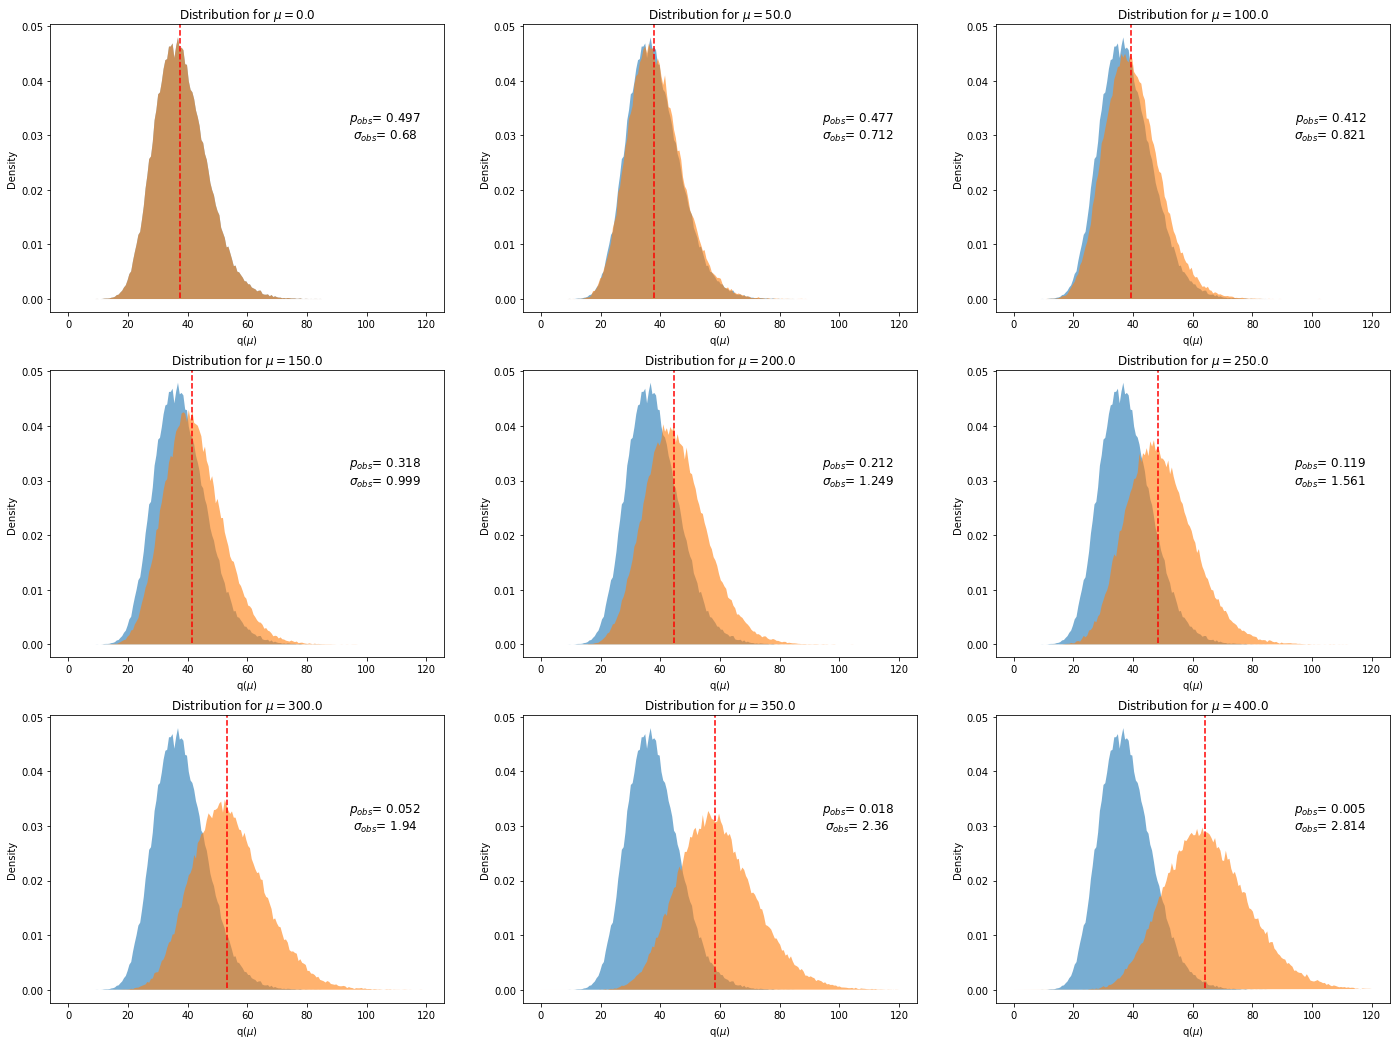

In [62]:
nr = 3
nc = 3
fig, axs = plt.subplots(nr, nc, figsize=(8*nc, 6*nr))
for i in range(0,nr):
    for j in range(0,nc):
        sub_plot_hists(axs[i,j], 200, 10*(j+nc*i))


As we can see the 95% CL is within the $[300, 350]$ $\mu$ value, from the plot below we can see that the exact value for wchich we obtain this CL is $\mu=310$

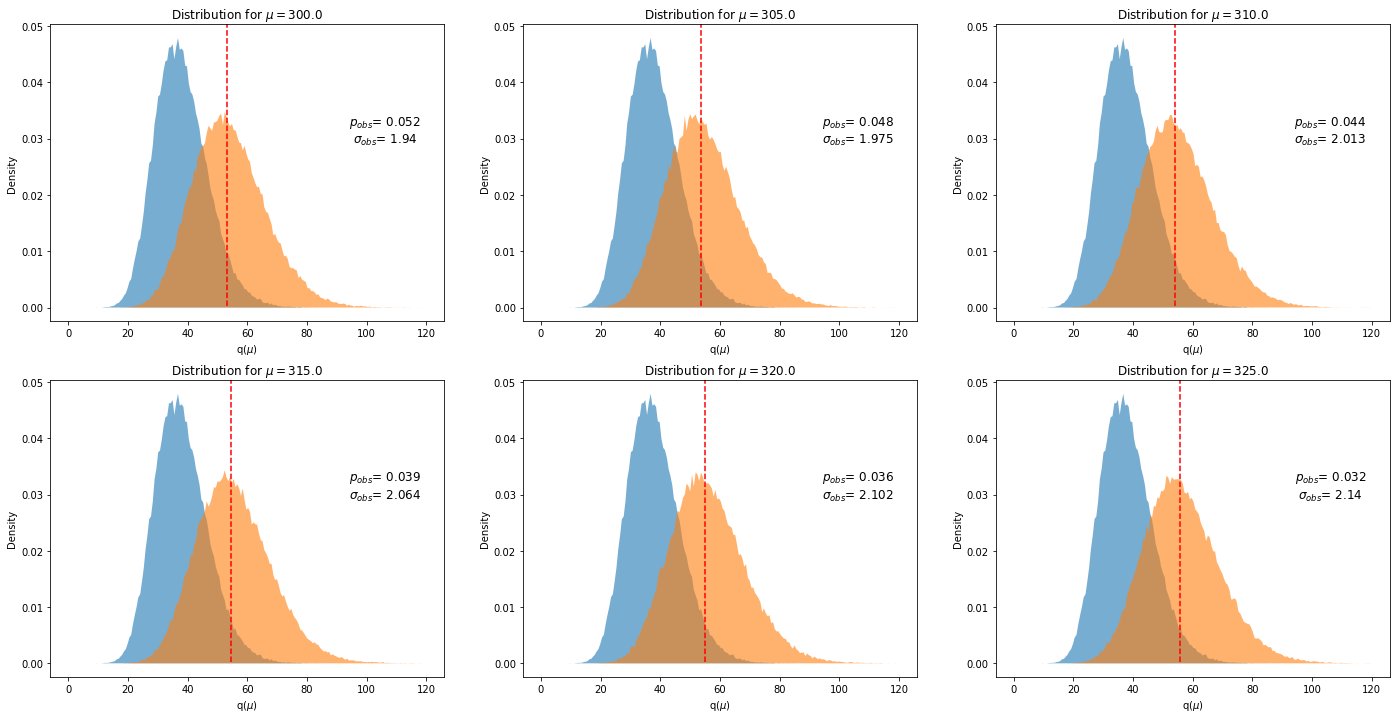

In [63]:
nr = 2
nc = 3
fig, axs = plt.subplots(nr, nc, figsize=(8*nc, 6*nr))
for i in range(0,nr):
    for j in range(0,nc):
        sub_plot_hists(axs[i,j], 200, 60+(j+nc*i))

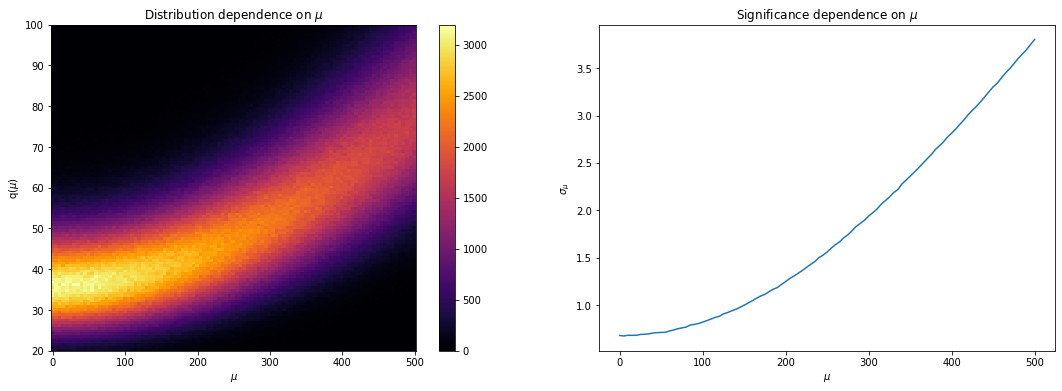

In [93]:
sigs=[]
for i in np.linspace(0,100,101, dtype=np.int):
    sigs.append(significance(200, i)[1])

h_mu=[]
for i in range (0, nsamp):
    h_mu.append(mus)
h_mu= np.array(h_mu).T

plot_all_distr(sigs, h_mu)

In [91]:
def plot_all_distr(sigs, h_mu):
    fig, axs = plt.subplots(1,2, figsize=(18,6))
    ax0 = axs[0].hist2d(h_mu.flatten(), data_AllMu.flatten(), density=False, range=[[-2.5, 502.5], [20, 100]], bins=[101, 120], cmap='inferno')
    axs[0].set_xlabel("$\mu$")
    axs[0].set_ylabel("q($\mu$)")
    axs[0].set_title("Distribution dependence on $\mu$")
    fig.colorbar(ax0[3], ax=axs[0])
    axs[1].plot(5*np.linspace(0,100, 101),sigs)
    axs[1].set_xlabel("$\mu$")
    axs[1].set_ylabel("$\sigma_{\mu}$")
    axs[1].set_title("Significance dependence on $\mu$")

ValueError: The dimension of bins must be equal to the dimension of the  sample x.

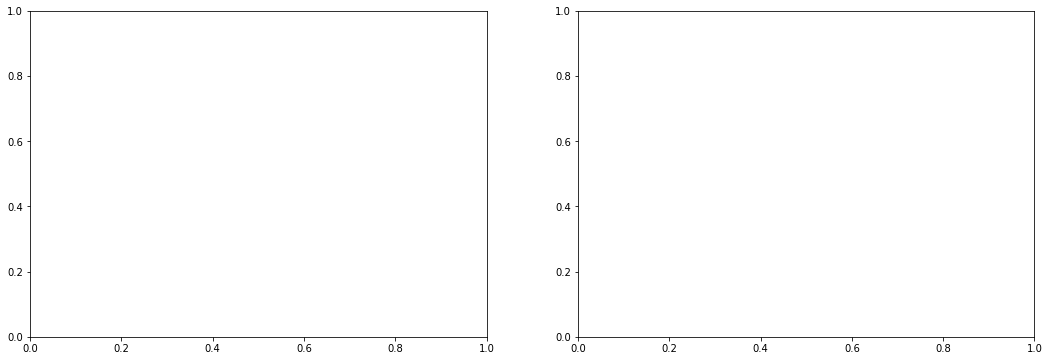

In [92]:
plot_all_distr(sigs, h_mu)

## ISO MU

In [95]:
nsamp = 100000
nbins = 40
nev   = 21000
mus = [10.0*x for x in range(0,101)]

data_AllMu = []
for mu in mus:
    fname = 'ToyMC_BatchMu_IsoMu__nsamples_'+str(nsamp)+'__nbins_'+str(nbins)+'__nev_'+str(nev)+'__mu_'+str(mu)+'.txt'
    data_AllMu.append(np.loadtxt("../MC_results/ToyMC_BatchMu_IsoMu__nsamples_100000__nbins_40__nev_21000/"+fname))

data_AllMu = np.array(data_AllMu)
print(data_AllMu)

[[30.069  33.8838 25.9989 ... 41.5138 29.4045 29.7887]
 [29.6599 34.1228 42.7693 ... 31.1157 44.4993 29.7242]
 [30.7532 22.0401 31.9348 ... 23.473  65.1246 44.8541]
 ...
 [56.6265 72.7713 80.9725 ... 80.3397 75.9905 84.4224]
 [56.5324 55.2619 96.0799 ... 69.9719 63.7669 73.0532]
 [56.5324 55.9832 71.8972 ... 64.602  83.0319 84.4467]]


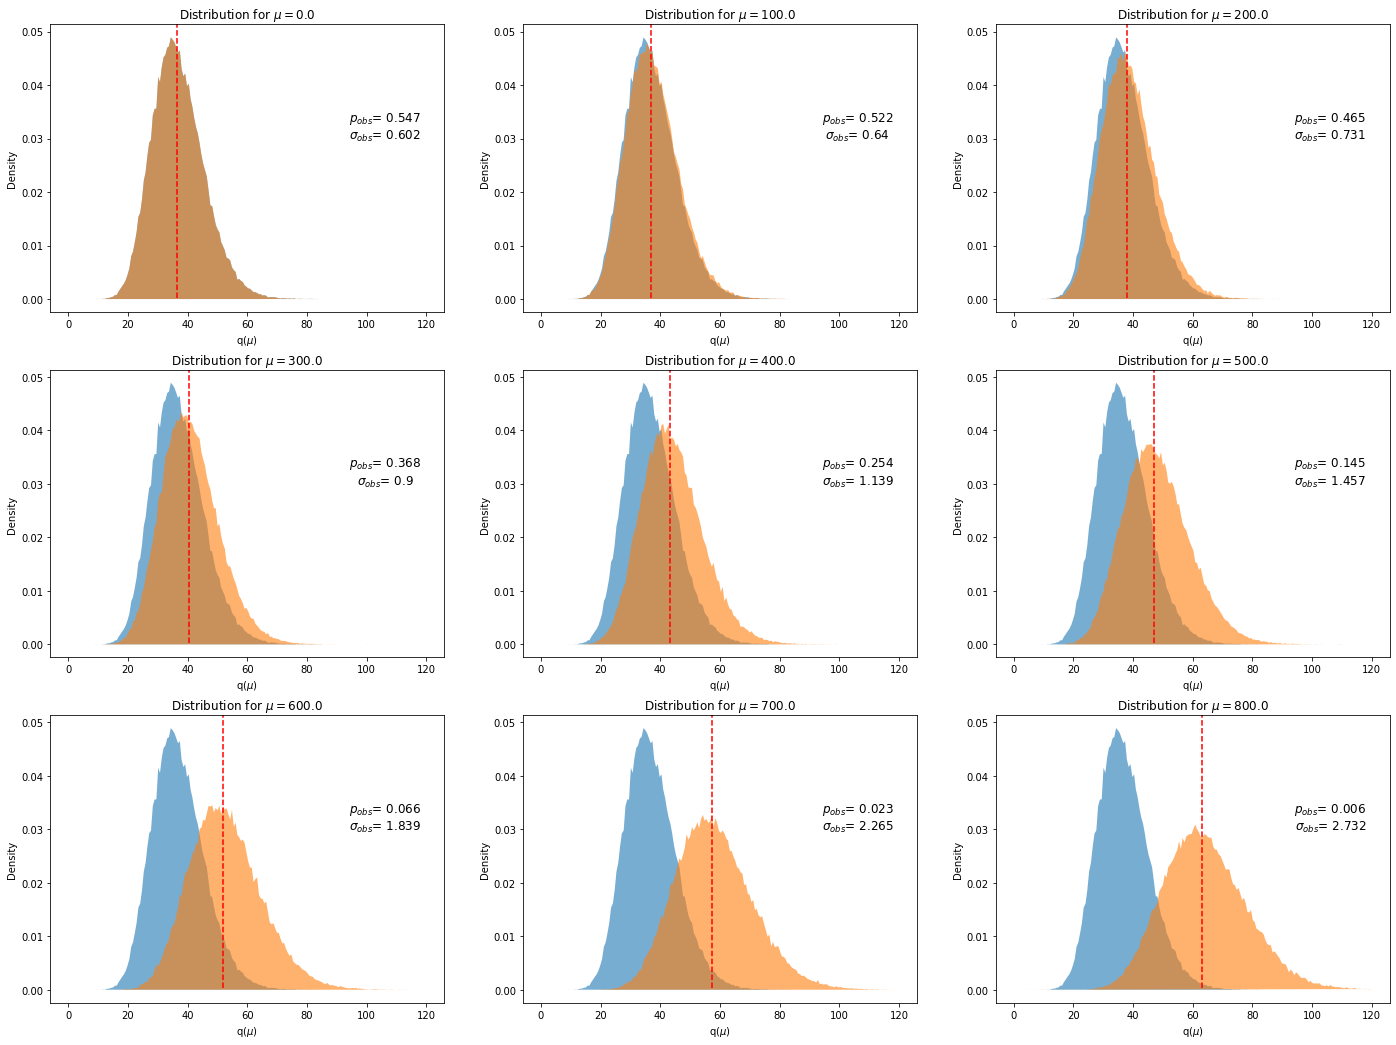

In [97]:
nr = 3
nc = 3
fig, axs = plt.subplots(nr, nc, figsize=(8*nc, 6*nr))
for i in range(0,nr):
    for j in range(0,nc):
        sub_plot_hists(axs[i,j], 200, 10*(j+nc*i))

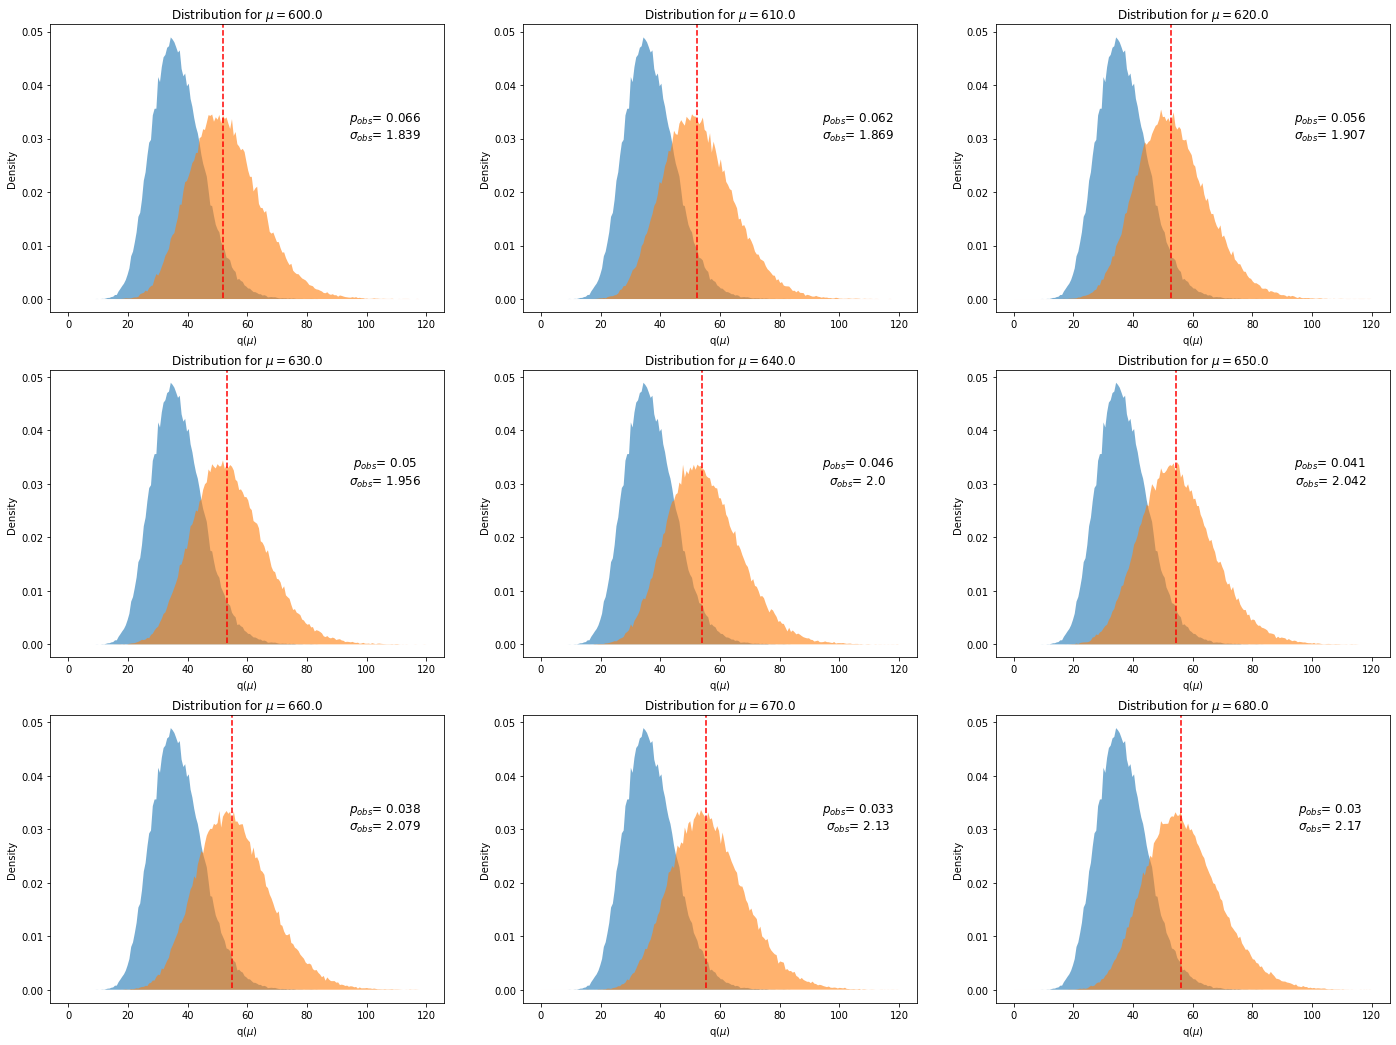

In [98]:
nr = 3
nc = 3
fig, axs = plt.subplots(nr, nc, figsize=(8*nc, 6*nr))
for i in range(0,nr):
    for j in range(0,nc):
        sub_plot_hists(axs[i,j], 200, 60+(j+nc*i))

In [103]:
mus = [10.0*x for x in range(0,101)]

sigs=[]
for i in np.linspace(0,100,101, dtype=np.int):
    sigs.append(significance(200, i)[1])

h_mu=[]
for i in range (0, nsamp):
    h_mu.append(mus)
h_mu= np.array(h_mu).T



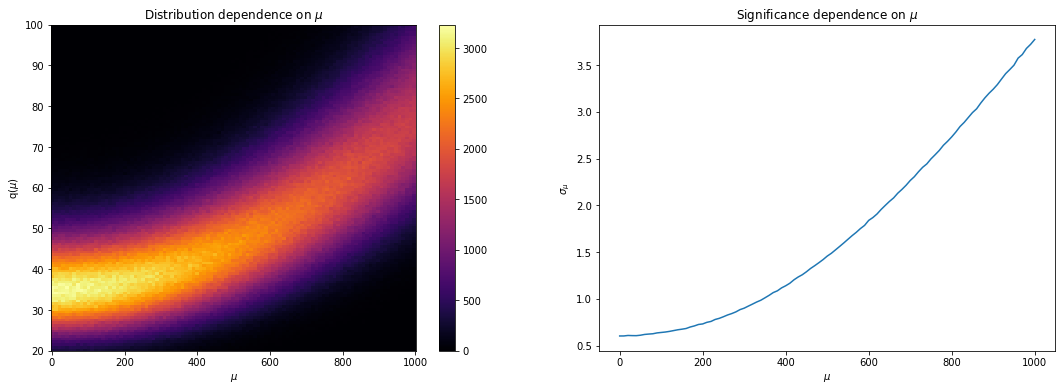

In [105]:
def plot_all_distr_isoMu(sigs, h_mu):
    fig, axs = plt.subplots(1,2, figsize=(18,6))
    ax0 = axs[0].hist2d(h_mu.flatten(), data_AllMu.flatten(), density=False, range=[[-2.5, 1002.5], [20, 100]], bins=[101, 120], cmap='inferno')
    axs[0].set_xlabel("$\mu$")
    axs[0].set_ylabel("q($\mu$)")
    axs[0].set_title("Distribution dependence on $\mu$")
    fig.colorbar(ax0[3], ax=axs[0])
    axs[1].plot(10*np.linspace(0,100, 101),sigs)
    axs[1].set_xlabel("$\mu$")
    axs[1].set_ylabel("$\sigma_{\mu}$")
    axs[1].set_title("Significance dependence on $\mu$")
    
plot_all_distr_isoMu(sigs, h_mu)

## final plots

In [1]:
import numpy as np
import matplotlib.pyplot as plt


## iso mu

In [15]:
nsamp = 100000
nbins = 40
nev   = 21000
mus = [10.0*x for x in range(0,101)]

data_AllMu = []
for mu in mus:
    fname = 'ToyMC_BatchMu_IsoMu__nsamples_'+str(nsamp)+'__nbins_'+str(nbins)+'__nev_'+str(nev)+'__mu_'+str(mu)+'.txt'
    data_AllMu.append(np.loadtxt("../MC_results/ToyMC_BatchMu_IsoMu__nsamples_100000__nbins_40__nev_21000/"+fname))

data_AllMu = np.array(data_AllMu)


In [16]:
%run -i 'finalPlots.py'

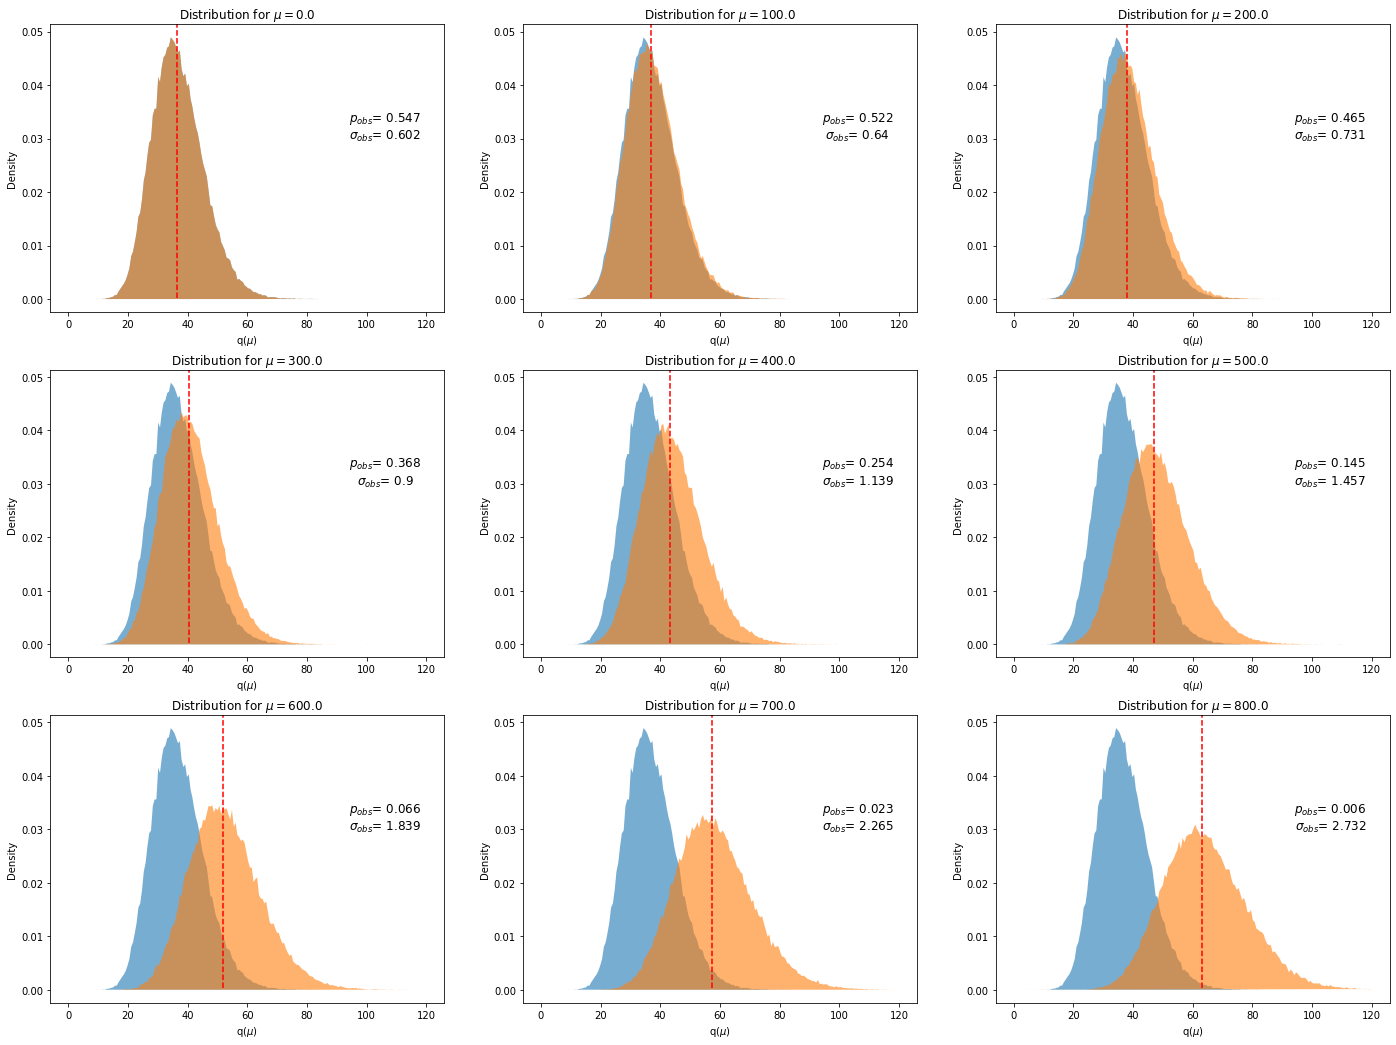

In [17]:
nr = 3
nc = 3
fig, axs = plt.subplots(nr, nc, figsize=(8*nc, 6*nr))
for i in range(0,nr):
    for j in range(0,nc):
        sub_plot_hists(axs[i,j], 200, 10*(j+nc*i))

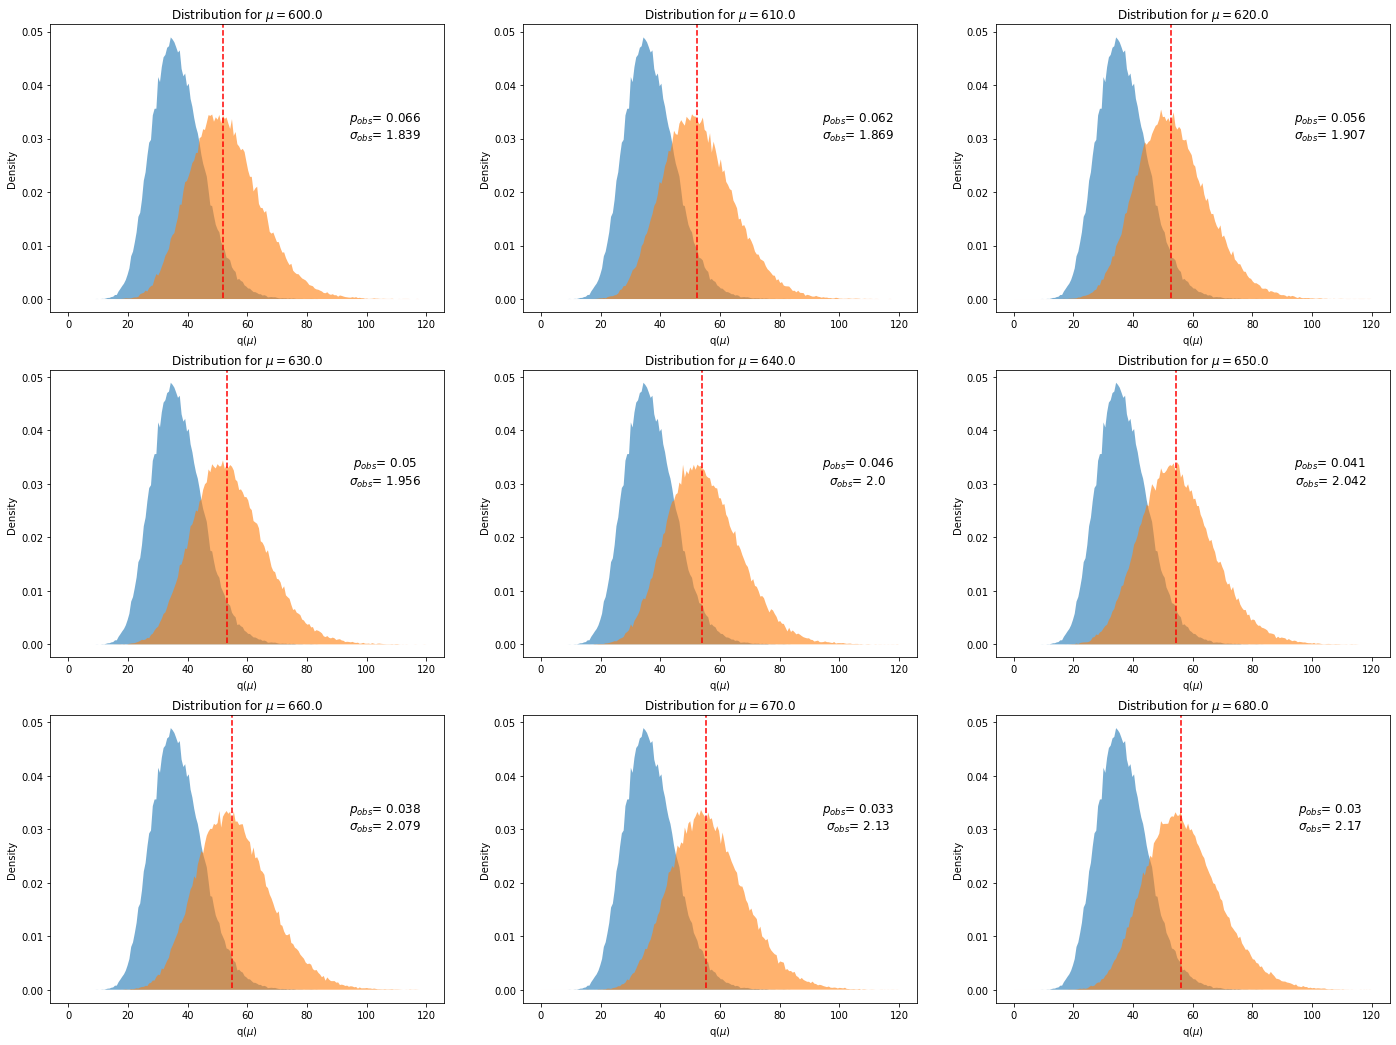

In [18]:
nr = 3
nc = 3
fig, axs = plt.subplots(nr, nc, figsize=(8*nc, 6*nr))
for i in range(0,nr):
    for j in range(0,nc):
        sub_plot_hists(axs[i,j], 200, 60+(j+nc*i))

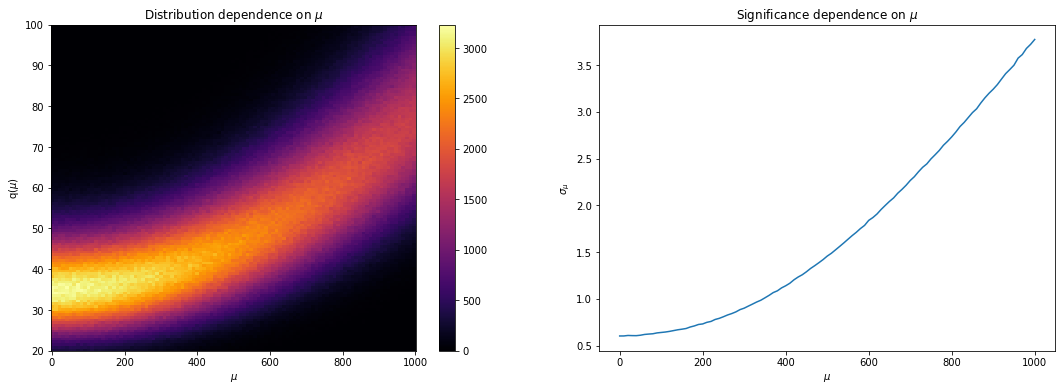

In [19]:
mus = [10.0*x for x in range(0,101)]

sigs=[]
for i in np.linspace(0,100,101, dtype=np.int):
    sigs.append(significance(200, i)[1])

h_mu=[]
for i in range (0, nsamp):
    h_mu.append(mus)
h_mu= np.array(h_mu).T

plot_all_distr_isoMu(sigs, h_mu)

## ISO TRK

In [20]:
nsamp = 100000
nbins = 40
nev   = 6000
mus = [5.0*x for x in range(0,101)]

data_AllMu = []
for mu in mus:
    fname = 'ToyMC_BatchMu_IsoTrk__nsamples_'+str(nsamp)+'__nbins_'+str(nbins)+'__nev_'+str(nev)+'__mu_'+str(mu)+'.txt'
    data_AllMu.append(np.loadtxt("../MC_results/ToyMC_BatchMu_IsoTrk__nsamples_100000__nbins_40__nev_6000/"+fname))

data_AllMu = np.array(data_AllMu)

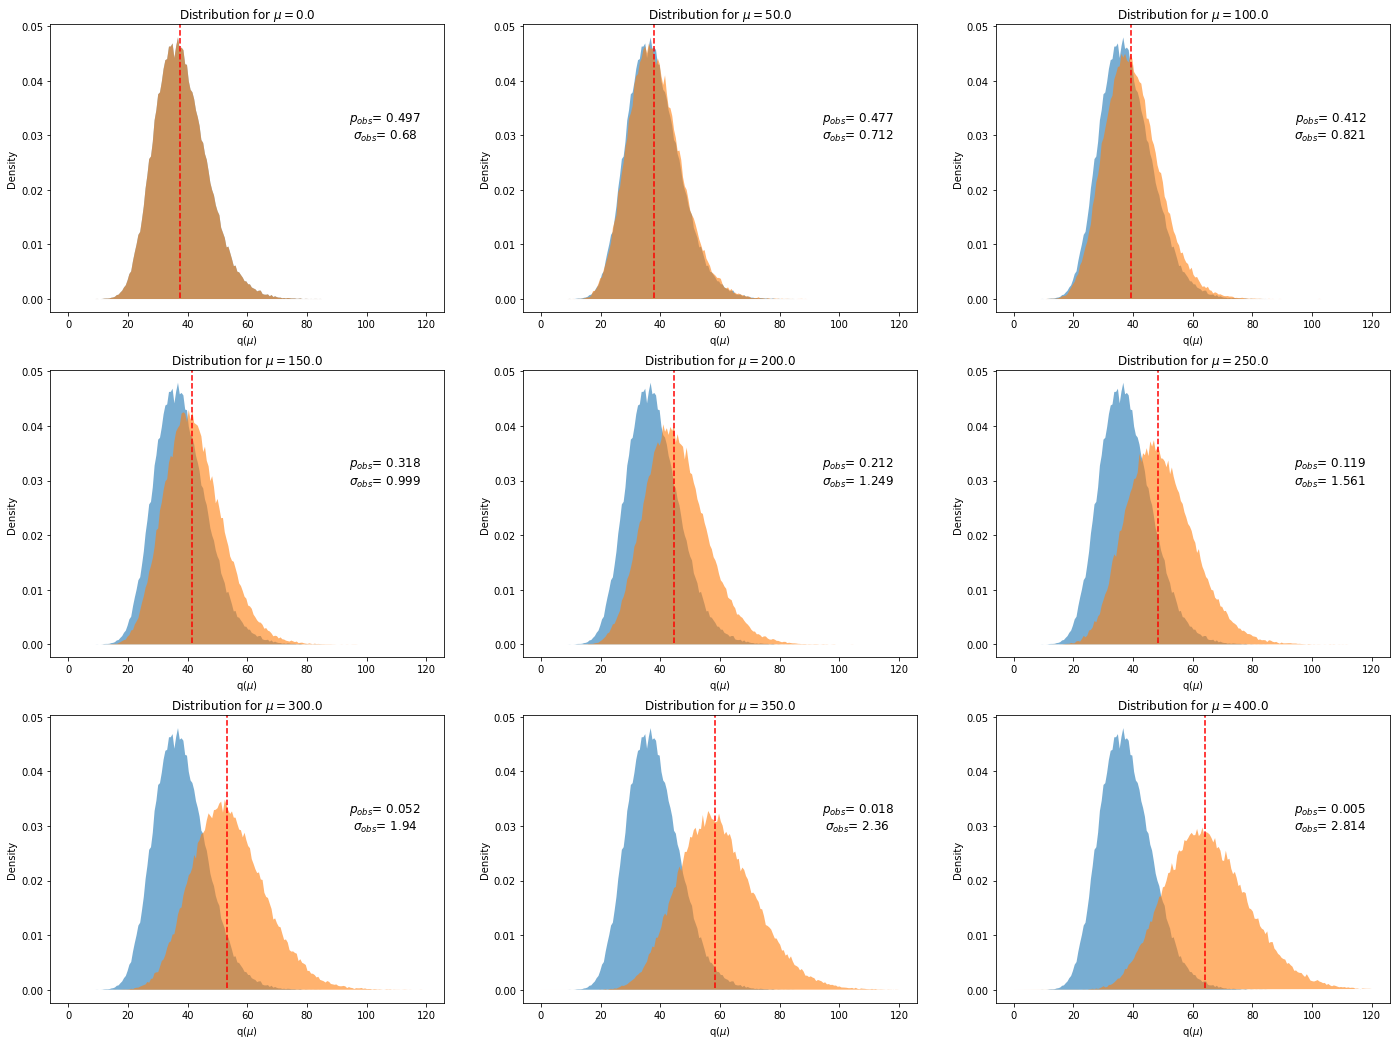

In [21]:
nr = 3
nc = 3
fig, axs = plt.subplots(nr, nc, figsize=(8*nc, 6*nr))
for i in range(0,nr):
    for j in range(0,nc):
        sub_plot_hists(axs[i,j], 200, 10*(j+nc*i))


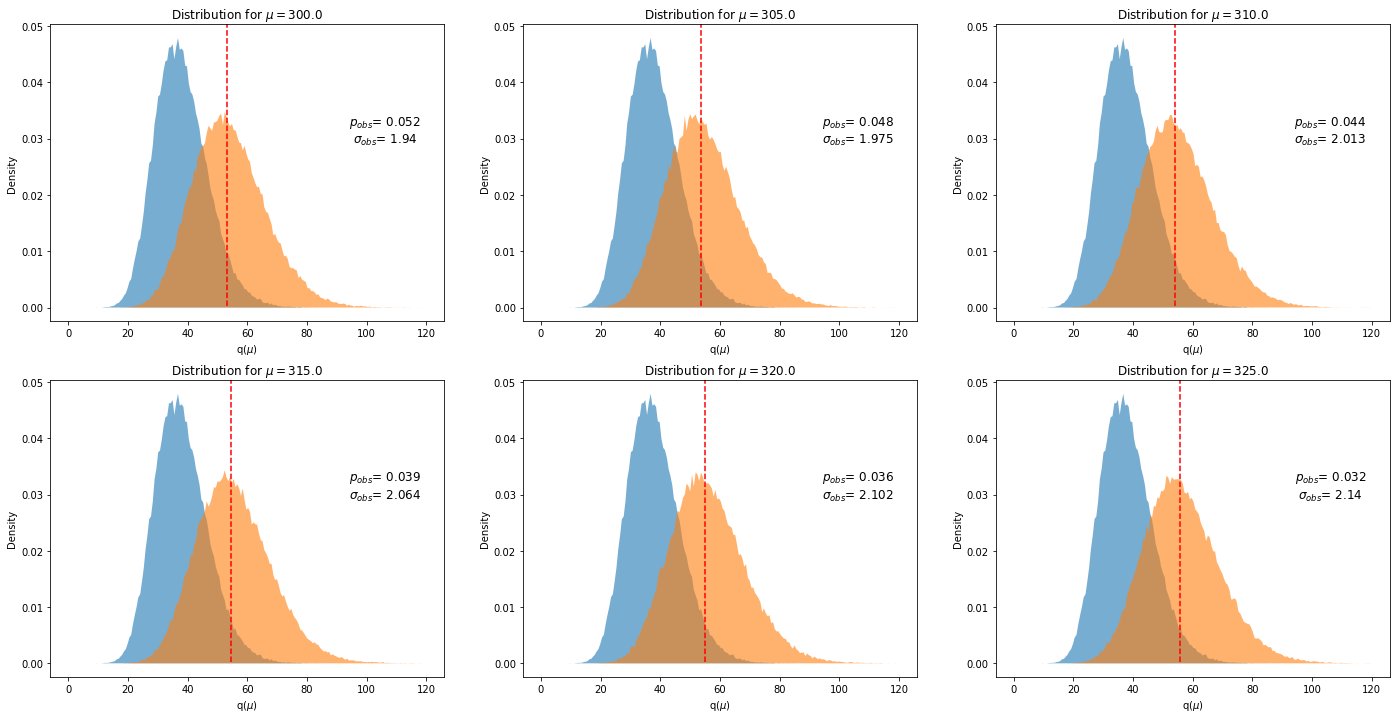

In [22]:
nr = 2
nc = 3
fig, axs = plt.subplots(nr, nc, figsize=(8*nc, 6*nr))
for i in range(0,nr):
    for j in range(0,nc):
        sub_plot_hists(axs[i,j], 200, 60+(j+nc*i))

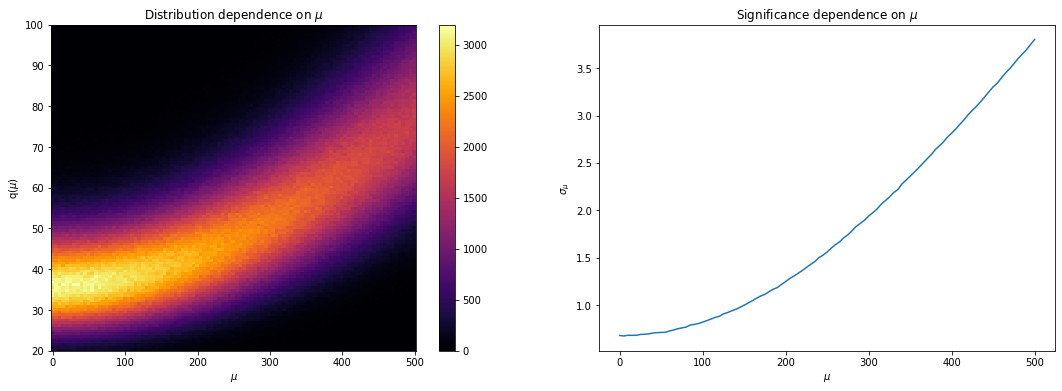

In [23]:
sigs=[]
for i in np.linspace(0,100,101, dtype=np.int):
    sigs.append(significance(200, i)[1])

h_mu=[]
for i in range (0, nsamp):
    h_mu.append(mus)
h_mu= np.array(h_mu).T

plot_all_distr_isoTrk(sigs, h_mu)